In this project, I use a Long Short-Term Memory (LSTM) neural network to predict future Bitcoin prices. The effectiveness of the model is measured by comparing its predictions against a baseline regression model. Before employing the model for investment, I verify its performance through backtesting. The investment constraint includes a 9-day horizon period and a principal investment of $550 USD.

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Function to preprocess the data
def preprocessing(prices, time_step=9):
    # Extract the close prices
    close_prices = prices["Close"].values
    
    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    close_prices = scaler.fit_transform(close_prices.reshape(-1, 1)).flatten()
    
    # Initialize lists to store input sequences and target values
    input_seqs = []
    targets = []
    
    for i in range(len(close_prices) - time_step):
        # Extract a sequence of prices from day i to day i+time_step-1
        sequence = close_prices[i:i+time_step]
        
        # Append the sequence to the input sequences list
        input_seqs.append(sequence)
        
        # Append the target price, which is the price 9 days ahead
        target = close_prices[i+time_step]
        targets.append(target)
    
    # Convert the lists to numpy arrays
    input_seqs = np.array(input_seqs)
    targets = np.array(targets)
    
    return input_seqs, targets, scaler

# Load your data (replace with your actual data loading method)
# Assuming prices is a pandas DataFrame with a "Close" column
data = pd.read_csv(r"C:\Users\saeed\Downloads\BTC-USD (3).csv")
prices = data[["Date","Close"]]

# Define the time step for each sequence
time_step = 9

# Preprocess the data to get input sequences and target values
input_seqs, targets, scaler = preprocessing(prices, time_step)

# Split the data into training and test sets
split_index = int(0.8 * len(input_seqs))
train_input_seqs, test_input_seqs = input_seqs[:split_index], input_seqs[split_index:]
train_targets, test_targets = targets[:split_index], targets[split_index:]

# Reshape the input sequences for compatibility with neural network input
train_input_seqs = np.reshape(train_input_seqs, (train_input_seqs.shape[0], train_input_seqs.shape[1], 1))
test_input_seqs = np.reshape(test_input_seqs, (test_input_seqs.shape[0], test_input_seqs.shape[1], 1))

# Define the LSTM neural network
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(train_input_seqs, train_targets, epochs=20, batch_size=32, validation_data=(test_input_seqs, test_targets))

# Evaluate the model
loss, mae = model.evaluate(test_input_seqs, test_targets)
print(f'Test Loss: {loss}, Test MAE: {mae}')

# Make predictions
predictions = model.predict(test_input_seqs)

# Inverse transform the predictions and actual values to original scale
predictions = scaler.inverse_transform(predictions)
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))



Epoch 1/20
89/89 [==============================] - 12s 35ms/step - loss: 0.0064 - mean_absolute_error: 0.0385 - val_loss: 8.5619e-04 - val_mean_absolute_error: 0.0205
Epoch 2/20
89/89 [==============================] - 1s 16ms/step - loss: 5.8105e-04 - mean_absolute_error: 0.0134 - val_loss: 0.0013 - val_mean_absolute_error: 0.0251
Epoch 3/20
89/89 [==============================] - 1s 17ms/step - loss: 5.8317e-04 - mean_absolute_error: 0.0133 - val_loss: 7.7488e-04 - val_mean_absolute_error: 0.0212
Epoch 4/20
89/89 [==============================] - 2s 17ms/step - loss: 5.4486e-04 - mean_absolute_error: 0.0129 - val_loss: 0.0015 - val_mean_absolute_error: 0.0285
Epoch 5/20
89/89 [==============================] - 2s 17ms/step - loss: 5.5539e-04 - mean_absolute_error: 0.0128 - val_loss: 6.9370e-04 - val_mean_absolute_error: 0.0196
Epoch 6/20
89/89 [==============================] - 2s 20ms/step - loss: 4.9601e-04 - mean_absolute_error: 0.0119 - val_loss: 6.7940e-04 - val_mean_absolute

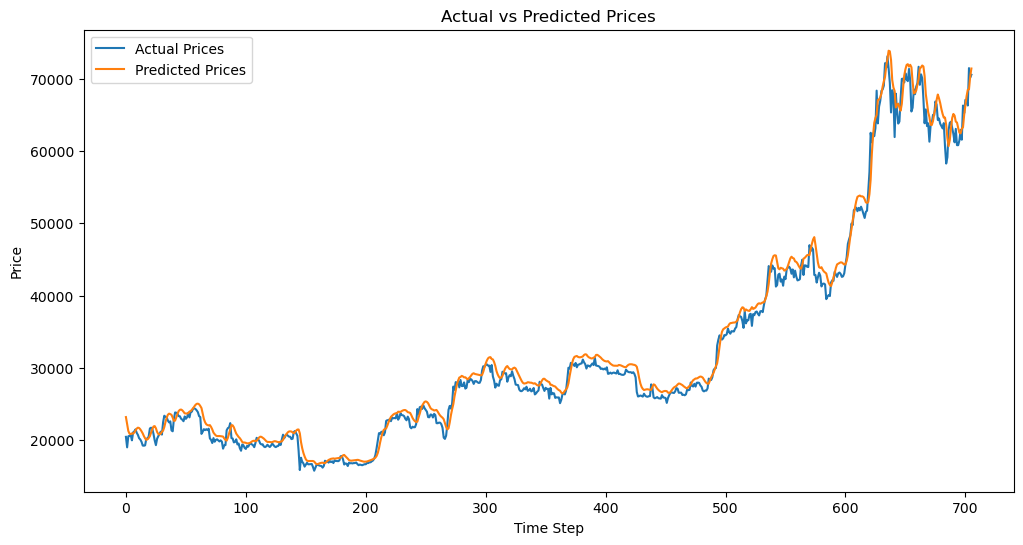

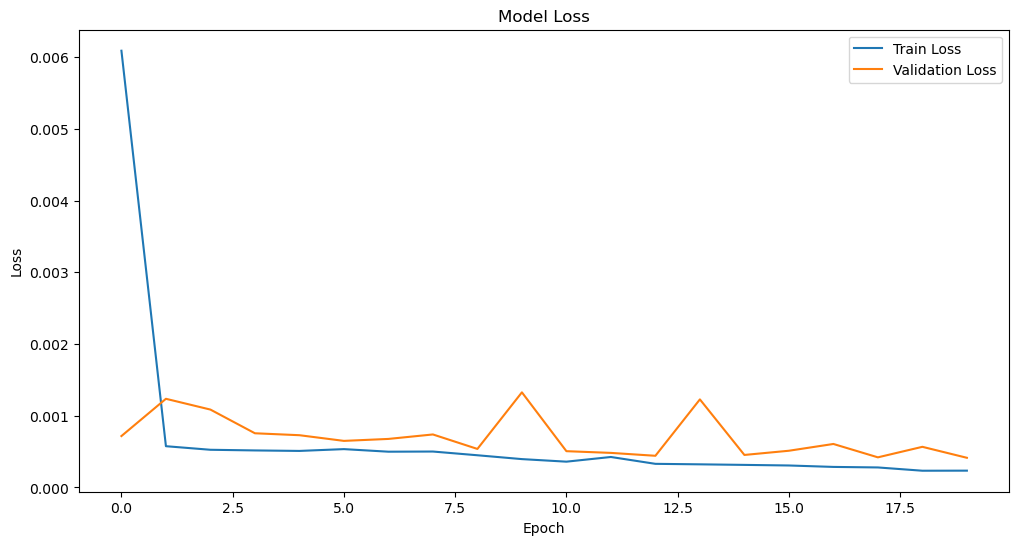

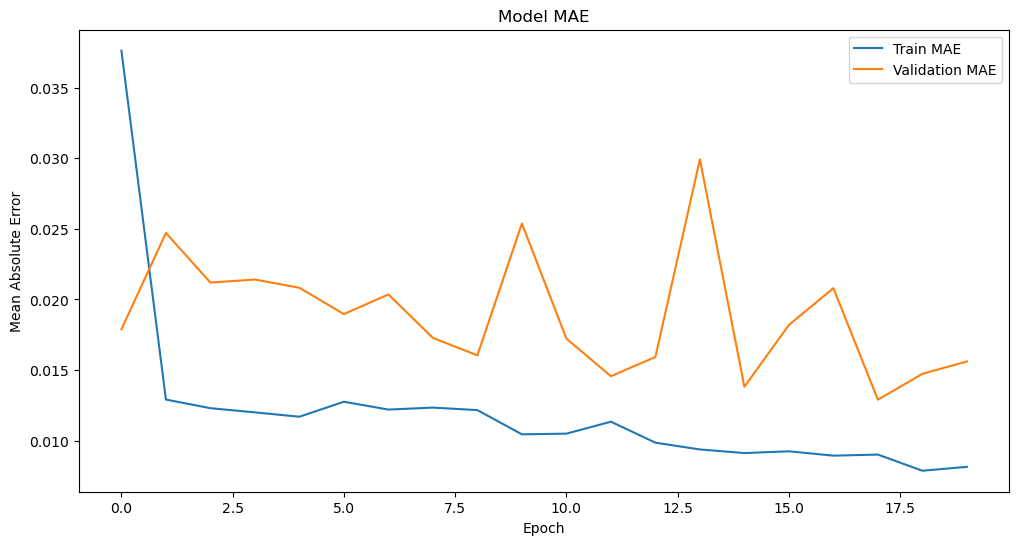

In [3]:
# Plot the test results against the predictions
plt.figure(figsize=(12, 6))
plt.plot(test_targets, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation MAE values
plt.figure(figsize=(12, 6))
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [4]:
# Assuming 'prices', 'scaler', and 'model' are already defined and trained
# Define the time step for each sequence
time_step = 9

# Extract the latest sequence of prices
latest_sequence = prices["Close"].values[-time_step:]

# Normalize the latest sequence and reshape for the model
latest_sequence_scaled = scaler.transform(latest_sequence.reshape(-1, 1)).reshape(1, time_step, 1)

# Make the prediction
predicted_price_scaled = model.predict(latest_sequence_scaled)

# Inverse transform the predicted value to get the original scale
predicted_price = scaler.inverse_transform(predicted_price_scaled)[0][0]

print(f"The predicted Bitcoin price 9 days from today is: {predicted_price}")


1/1 [==============================] - 0s 45ms/step
The predicted Bitcoin price 9 days from today is: 72054.7734375


In [22]:
today_price = 70531
return_ = ((predicted_price-today_price)/today_price)

In [27]:
return_*550

11.882369321645802